In [199]:
import re
from keras.models import Sequential
import tensorflow as tf
from PIL import Image
# from matplotlib import image, pyplot
from tensorflow.keras import backend
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Activation, Dense, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.preprocessing import image
from keras import regularizers, optimizers
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.model_selection import train_test_split 
import math
import time
import datetime
from tqdm import tqdm
import cv2
import glob
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import sys

In [15]:
df = pd.read_excel('/Users/sharduljanaskar/Downloads/decimal_point/TrainingSet_8VWz3PL.xlsx')

In [70]:
os.chdir('/Users/sharduljanaskar/Downloads/decimal_point/Training_Images')

In [49]:
# def load_images_from_folder(folder):
#     train_img = []
#     for filename in tqdm(sorted(os.listdir(folder))):
#         img = image.load_img(os.path.join(folder,filename),target_size=(128,128,3),grayscale=False)
#         img = image.img_to_array(img)
# #         img = np.expand_dims(img,axis=0)
# #         img = image/255
#         train_img.append(img)
#     return np.array(train_img)

In [132]:
def load_images_from_folder(dataframe):
    train_img = []
    for filename in dataframe['file']:
        img = cv2.imread('Image-'+str(filename)+'.jpg')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,(128,128))
#         img = np.expand_dims(img,axis=0)
#         img = image/255
        train_img.append(img)
    return np.array(train_img)

In [133]:
X= load_images_from_folder(df)

In [71]:
# def load_images_from_folder(dataframe):
#     train_img = []
#     for filename in dataframe['file']:
#         img = image.load_img('Image-'+str(filename)+'.jpg',target_size=(128,128,3),grayscale=False)
#         img = image.img_to_array(img)
# #         img = np.expand_dims(img,axis=0)
# #         img = image/255
#         train_img.append(img)
#     return np.array(train_img)

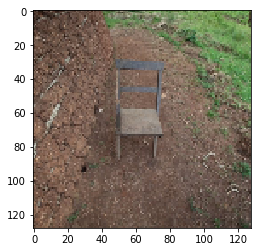

In [134]:
plt.imshow(X[0])

In [144]:
# X1 = X.reshape(X.shape[0],X.shape[1]*X.shape[2]*X.shape[3])
# print(X.shape)

In [112]:
# def plot_figure(X):
#     plt.figure(figsize=(5,5))
#     plt.imshow(X)
#     plt.show()
#     plt.close()

In [136]:
y = df['label'].values
y = to_categorical(y)

In [137]:
X.shape

(5219, 128, 128, 3)

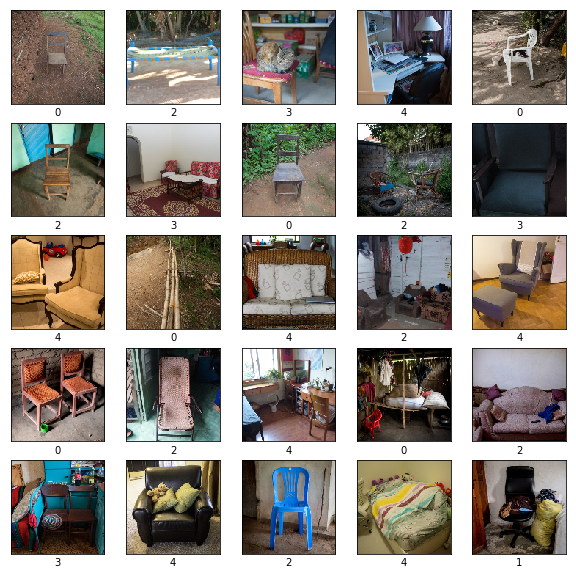

In [135]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow((X[i]))
    plt.xlabel(df['label'][i])
plt.show()

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [226]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=(128,128,3)),
#     tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (5, 5), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (5, 5), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [227]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [139]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(32,kernel_size=(3, 3), input_shape=(128,128,3)),
#     tf.keras.layers.ZeroPadding2D(padding=(1,1)),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.ReLU(),
#     tf.keras.layers.Conv2D(32, kernel_size=(3, 3)),
#     tf.keras.layers.ZeroPadding2D(padding=(1,1)),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.ReLU(),
#     tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
#     tf.keras.layers.Dropout(0.2),
    
#     tf.keras.layers.Conv2D(64, kernel_size=(3, 3)),
#     tf.keras.layers.ZeroPadding2D(padding=(1,1)),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.ReLU(),
#     tf.keras.layers.Conv2D(64,kernel_size=(3, 3)),
#     tf.keras.layers.ZeroPadding2D(padding=(1,1)),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.ReLU(),
#     tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
#     tf.keras.layers.Dropout(0.2),
    
#     tf.keras.layers.Conv2D(128, kernel_size=(3, 3)),
#     tf.keras.layers.ZeroPadding2D(padding=(1,1)),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.ReLU(),
#     tf.keras.layers.Conv2D(128,kernel_size=(3, 3)),
#     tf.keras.layers.ZeroPadding2D(padding=(1,1)),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.ReLU(),
#     tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
#     tf.keras.layers.Dropout(0.2),
    
#     tf.keras.layers.Conv2D(256,kernel_size=(3, 3)),
#     tf.keras.layers.ZeroPadding2D(padding=(1,1)),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.PReLU(),    
#     tf.keras.layers.Conv2D(256,kernel_size=(3, 3)),
#     tf.keras.layers.ZeroPadding2D(padding=(1,1)),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.PReLU(),
#     tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
#     tf.keras.layers.Dropout(0.25),
    
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dropout(0.25),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(5,activation='softmax')
# ])
# #     tf.keras.layers.Activation('softmax')])


# # sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
# model.compile(loss='categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

In [143]:
model.fit(X_train,y_train,epochs=20,batch_size=128)

Epoch 1/20
4175/4175 [==============================] - 162s 39ms/sample - loss: 26.2339 - acc: 0.2108
Epoch 2/20
4175/4175 [==============================] - 158s 38ms/sample - loss: 1.5886 - acc: 0.2649
Epoch 3/20
4175/4175 [==============================] - 158s 38ms/sample - loss: 1.5109 - acc: 0.3416
Epoch 4/20
4175/4175 [==============================] - 159s 38ms/sample - loss: 1.3693 - acc: 0.4323
Epoch 5/20
4175/4175 [==============================] - 540s 129ms/sample - loss: 1.0690 - acc: 0.5686
Epoch 6/20
4175/4175 [==============================] - 162s 39ms/sample - loss: 0.8508 - acc: 0.6642
Epoch 7/20
4175/4175 [==============================] - 161s 39ms/sample - loss: 0.6396 - acc: 0.7598
Epoch 8/20
4175/4175 [==============================] - 160s 38ms/sample - loss: 0.5101 - acc: 0.8079
Epoch 9/20
4175/4175 [==============================] - 164s 39ms/sample - loss: 0.3832 - acc: 0.8620
Epoch 10/20
4175/4175 [==============================] - 161s 38ms/sample - loss

In [145]:
predictions = model.predict_classes(X_test)

In [146]:
y_test_non_category = [ np.argmax(t) for t in y_test ]

conf_mat = confusion_matrix(y_test_non_category, predictions)

In [147]:
accuracy_score(y_test_non_category,predictions)

0.3783524904214559

In [151]:
y_test_non_category[:5]

[0, 1, 2, 2, 4]

In [152]:
predictions[:5]

array([4, 2, 3, 3, 4])

In [155]:
print(classification_report(y_test_non_category,predictions))

              precision    recall  f1-score   support

           0       0.44      0.38      0.41       177
           1       0.39      0.33      0.36       196
           2       0.44      0.34      0.39       222
           3       0.34      0.39      0.36       211
           4       0.33      0.44      0.38       238

    accuracy                           0.38      1044
   macro avg       0.39      0.38      0.38      1044
weighted avg       0.39      0.38      0.38      1044



In [157]:
X1 = X.reshape(X.shape[0], X.shape[1]*X.shape[2]*X.shape[3])
print (X1.shape)

(5219, 49152)


In [158]:
X_norm = X1 / 255.
print ('X1.min()', X_norm.min())
print ('X1.max()', X_norm.max())

X1.min() 0.0
X1.max() 1.0


In [159]:
X_norm.mean(axis=0).shape

(49152,)

In [160]:
X_norm.mean(axis=0)

array([0.41778344, 0.38691884, 0.35183586, ..., 0.34967483, 0.307703  ,
       0.274615  ])

In [161]:
cov = np.cov(X_norm, rowvar=True)

In [162]:
U,S,V = np.linalg.svd(cov)

In [163]:
print (U.shape, S.shape)

(5219, 5219) (5219,)


In [165]:
print (np.diag(S))
print ('\nshape:', np.diag(S).shape)

[[4.16486914e+01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.93677633e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.57835058e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.24244750e-16
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.54548460e-16 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 5.68203601e-17]]

shape: (5219, 5219)


W1213 14:18:56.024857 4759594432 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


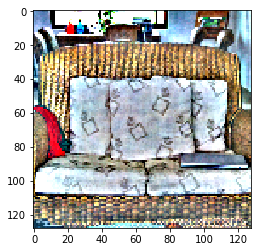

In [167]:
epsilon = 0.1
X_ZCA = U.dot(np.diag(1.0/np.sqrt(S + epsilon))).dot(U.T).dot(X_norm)

plt.imshow(X1[12, :].reshape(128,128,3))
plt.imshow(X_ZCA[12, :].reshape(128,128,3))

In [168]:
X_ZCA_rescaled = (X_ZCA - X_ZCA.min()) / (X_ZCA.max() - X_ZCA.min())
print ('min:', X_ZCA_rescaled.min())
print ('max:', X_ZCA_rescaled.max())

min: 0.0
max: 1.0


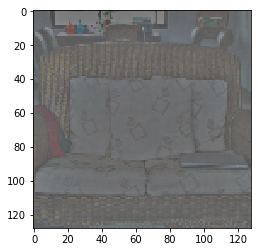

In [171]:
plt.imshow(X1[12, :].reshape(128,128,3))
plt.imshow(X_ZCA_rescaled[12, :].reshape(128,128,3))

In [176]:
X_tr, X_tt, y_tr, y_tt = train_test_split(X_ZCA.reshape(X1.shape[0],128,128,3), y, random_state=42, test_size=0.2)

In [229]:
model.fit(X_tr,y_tr,epochs=10,batch_size=128,validation_split =0.2)

Train on 3340 samples, validate on 835 samples
Epoch 1/10
3340/3340 [==============================] - 206s 62ms/sample - loss: 20.3473 - acc: 0.2440 - val_loss: 5.6587 - val_acc: 0.1844
Epoch 2/10
3340/3340 [==============================] - 168s 50ms/sample - loss: 14.9531 - acc: 0.3045 - val_loss: 9.0073 - val_acc: 0.1880
Epoch 3/10
 256/3340 [=>............................] - ETA: 2:19 - loss: 14.9430 - acc: 0.3477

KeyboardInterrupt: 

In [190]:
prediction_ = model.predict_classes(X_tt)

In [191]:
accuracy_score(y_test_non_category,prediction_)

0.2614942528735632

In [181]:
print(classification_report(y_test_non_category,prediction_))

              precision    recall  f1-score   support

           0       0.37      0.32      0.35       177
           1       0.32      0.43      0.37       196
           2       0.32      0.33      0.32       222
           3       0.42      0.36      0.39       211
           4       0.34      0.32      0.33       238

    accuracy                           0.35      1044
   macro avg       0.36      0.35      0.35      1044
weighted avg       0.35      0.35      0.35      1044



In [217]:
space = {

            'units1': hp.uniform('units1', 64,128),
            'units2': hp.uniform('units2', 64,256),

            'dropout1': hp.uniform('dropout1', .25,.75),
            'dropout2': hp.uniform('dropout2',  .25,.75),

            'batch_size' : hp.uniform('batch_size', 28,128),

            'nb_epochs' :  100,
            'optimizer': hp.choice('optimizer',['adadelta','adam','rmsprop']),
            'activation': 'relu'
        }

In [218]:
def f_nn(params):
    
    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(params['units1'],(5, 5),activation='relu',input_shape=(128,128,3)),
#     tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(params['dropout1']),
        
    tf.keras.layers.Conv2D(params['units1'], (5, 5)),
    tf.keras.layers.Activation(params['activation']),    
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(params['dropout2']),
    
    tf.keras.layers.Conv2D(params['units1'], (5, 5)),
    tf.keras.layers.Activation(params['activation']),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(params['dropout1']),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(params['units2']),
    tf.keras.layers.Activation(params['activation']),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
    ])
    
    model.compile(loss='binary_crossentropy', optimizer=params['optimizer'])
    
    model.fit(X_tr, y_tr, nb_epoch=params['nb_epochs'], batch_size=params['batch_size'], verbose = 0)
    pred_auc =model.predict_proba(X_tt, batch_size = 128, verbose = 0)
    acc = roc_auc_score(y_tt, pred_auc)
    print('AUC:', acc)
    sys.stdout.flush()
    return {'loss': -acc, 'status': STATUS_OK}

In [221]:
trials = Trials()
best = fmin(f_nn, space, algo=tpe.suggest, max_evals=20, trials=trials)
print ('best: ')
print (best)

  0%|          | 0/20 [00:00<?, ?it/s, best loss: ?]


ValueError: Ambiguous dimension: 82.31304922259858

In [222]:
conf_mat

array([[ 68,  25,  22,  28,  34],
       [ 33,  65,  22,  27,  49],
       [ 16,  25,  76,  46,  59],
       [ 14,  23,  25,  82,  67],
       [ 23,  28,  27,  56, 104]])

In [230]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

In [231]:
datagen.fit(X_train)

In [233]:
model.fit_generator(datagen.flow(X_train, y_train, batch_size=128),
                                 epochs=10)

Epoch 1/10
33/33 [==============================] - 197s 6s/step - loss: 11.3117 - acc: 0.2697
Epoch 2/10
33/33 [==============================] - 186s 6s/step - loss: 6.3664 - acc: 0.2766
Epoch 3/10
33/33 [==============================] - 194s 6s/step - loss: 3.4940 - acc: 0.2896
Epoch 4/10
33/33 [==============================] - 206s 6s/step - loss: 2.1429 - acc: 0.3032
Epoch 5/10
33/33 [==============================] - 206s 6s/step - loss: 1.6644 - acc: 0.3123
Epoch 6/10
33/33 [==============================] - 193s 6s/step - loss: 1.5463 - acc: 0.3231
Epoch 7/10
33/33 [==============================] - 194s 6s/step - loss: 1.5238 - acc: 0.3262
Epoch 8/10
33/33 [==============================] - 187s 6s/step - loss: 1.5035 - acc: 0.3286
Epoch 9/10
33/33 [==============================] - 183s 6s/step - loss: 1.4545 - acc: 0.3480
Epoch 10/10
33/33 [==============================] - 183s 6s/step - loss: 1.4387 - acc: 0.3531


In [234]:
pred = model.predict_classes(X_tt)

In [235]:
accuracy_score(y_test_non_category,pred)

0.22509578544061304